# Previsão de Votação de Deputados 
### Laboratório da disciplina Aprendizagem de Máquina ministrada pelo professor Leandro Balby
### Aluno: Carlos Vinicius Alves Minervino

### Referências:

[Link da Atividade de laboratório](https://canvas.instructure.com/courses/5142637/assignments/31711944)

[Artigo web: Regularized Linear Models](https://www.kaggle.com/apapiu/regularized-linear-models)

[Repositório no GitHub de Carlos Vinicius](https://github.com/viniciuscva/disciplinaAM/)

[Link do Dataset utilizado para treino](https://canvas.instructure.com/courses/5142637/files/186498394?wrap=1)

[Link do Dataset utilizado para teste (2014)](https://raw.githubusercontent.com/viniciuscva/disciplinaAM/main/previsao_de_votacao_de_deputados/eleicoes_2014.csv)


Analisar as distribuições das variáveis para ver se estão enviesadas e precisam de correção; tratamento de valores ausentes, variáveis categóricas e normalização, quando for o caso.

Construir modelos de regressão com (ridge e lasso) e sem regularização.
Considerar outros modelos ainda não vistos em sala de sua escolha (e.g. SVR, Regression Trees, KNN e Random Florests).

Tunar os hiperâmetros para cada caso e retornar os rmses de validação cruzada para todos os modelos avaliados.

Plotar os resíduos versus predições e analisar se esses plots representam bons indícios da adequabilidade dos modelos a esse problema.

Alguns dias antes da entrega final serão liberados os dados de teste referentes à 2014 para validação final dos seus melhores modelos.

Dica: Uma coisa que você pode fazer é usar os dados de 2006 como treino e os de 2010 como validação. Uma vez encontrados os melhores modelos para 2010 junte 2006+2010, retreine, e aplique o modelo aos dados de 2014 que serão liberados.

Responder:
Dentre os modelos avaliados, qual foi o que deu o melhor resultado nos dados de 2014 em termos de RMSE? Justifique bem sua resposta.

A entrega deve ser um notebook Jupyter com código python e texto explicativo quando necessário. Crie um repositório na sua conta do github e envie o link do html do notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/viniciuscva/disciplinaAM/main/previsao_de_votacao_de_deputados/eleicoes_2006_a_2010.csv")
dados.head()

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.666667,NaN,...,14,14,16583.60,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.846154,6625.0,...,24,23,20325.99,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.80,9257.550000,2250.0,...,123,108,146011.70,1351.960185,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428
3,2006,10002,ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.186667,NaN,...,8,8,3001.12,375.140000,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,1193
4,2006,10003,ANSELMO DE JESUS ABREU,RO,PT,48,48,NaN,NaN,NaN,...,133,120,116416.64,970.138667,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,29401


In [3]:
dados['ano'].value_counts()

2010    3942
2006    3388
Name: ano, dtype: int64

In [4]:
dados = dados.sort_values(by=['ano'])
dados.head(1)

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.0,2766.666667,NaN,...,14,14,16583.6,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579


In [5]:
#variavel all_data vai guardar as features
all_data = dados.loc[:, 'uf':'ocupacao']
all_data.head(1)

,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao
0,AP,PT,6,6,16600.0,2766.666667,NaN,9000.0,6300.0,1300.0,14,14,16583.6,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR


In [6]:
train = dados[dados['ano']==2006]
dev = dados[dados['ano']==2010]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2de2c8250>,
      dtype=object)

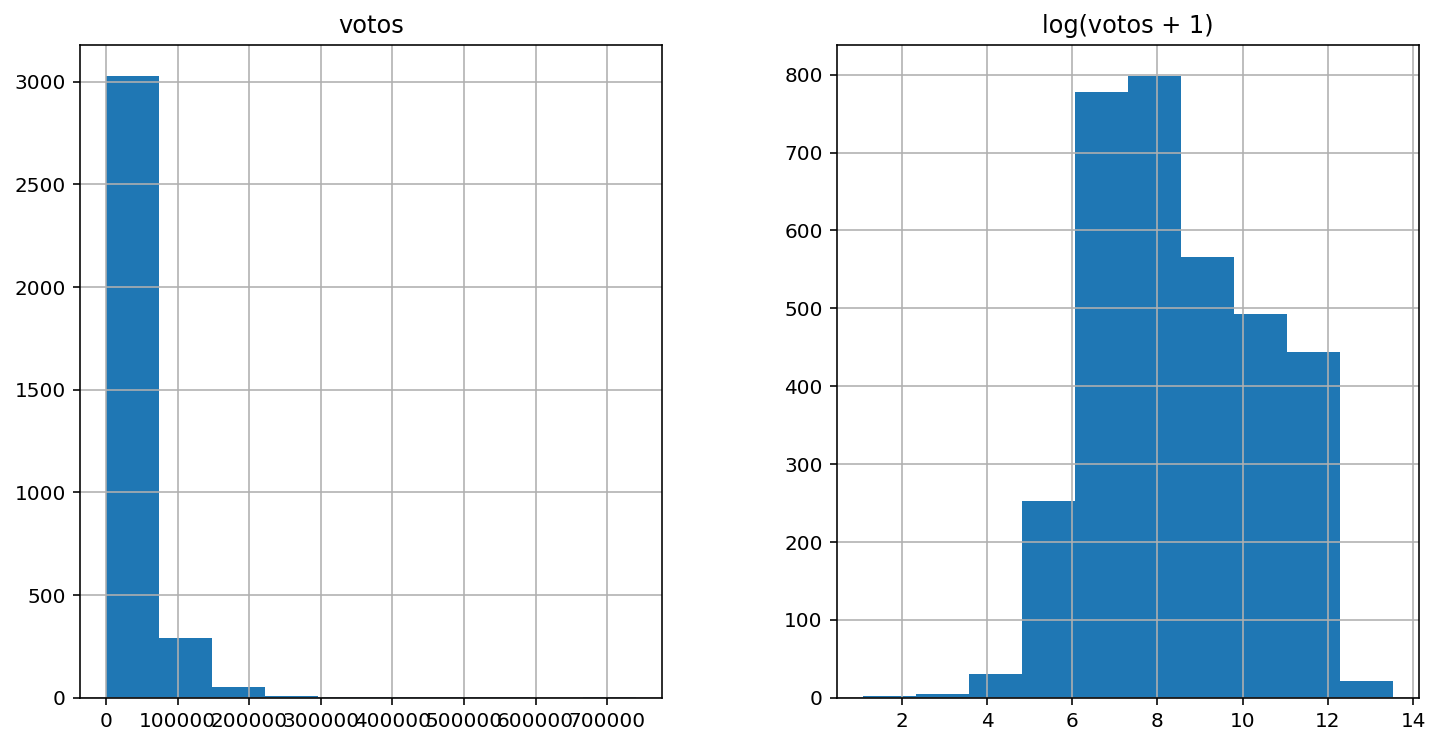

In [7]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
votos = pd.DataFrame({"votos":train["votos"], "log(votos + 1)":np.log1p(train["votos"])})
votos.hist()

In [8]:
train["votos"] = np.log1p(train["votos"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
numeric_feats

Index(['quantidade_doacoes', 'quantidade_doadores', 'total_receita',
       'media_receita', 'recursos_de_outros_candidatos/comites',
       'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas',
       'recursos_proprios', 'quantidade_despesas', 'quantidade_fornecedores',
       'total_despesa', 'media_despesa'],
      dtype='object')

In [10]:
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
print('skewed features: ',skewed_feats)

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

skewed features:  Index(['quantidade_doacoes', 'quantidade_doadores', 'total_receita',
       'media_receita', 'recursos_de_outros_candidatos/comites',
       'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas',
       'recursos_proprios', 'quantidade_despesas', 'quantidade_fornecedores',
       'total_despesa', 'media_despesa'],
      dtype='object')


In [11]:
all_data = pd.get_dummies(all_data)
all_data.head()

,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,...,"ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS",ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,ocupacao_TÉCNICO EM EDIFICAÇÕES,ocupacao_TÉCNICO EM INFORMÁTICA,ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",ocupacao_VEREADOR,ocupacao_VETERINÁRIO,ocupacao_VIGILANTE,ocupacao_ZOOTECNISTA
0,1.945910,1.945910,9.717218,7.925760,NaN,9.105091,8.748464,7.170888,2.708050,2.708050,...,0,0,0,0,0,0,1,0,0,0
2252,1.098612,1.098612,5.327876,4.639572,5.327876,NaN,NaN,NaN,1.098612,1.098612,...,0,0,0,0,0,0,0,0,0,0
2253,2.397895,2.302585,8.471463,6.275912,6.717200,7.673688,7.601402,NaN,2.079442,2.079442,...,0,0,0,0,0,0,0,0,0,0
2254,2.944439,2.564949,12.480673,9.995808,6.552508,11.002117,12.429220,10.021315,5.849325,5.645447,...,0,0,0,0,0,0,0,0,0,0
2255,1.386294,1.386294,6.189085,5.094568,6.189085,NaN,NaN,NaN,1.386294,1.386294,...,0,0,0,0,0,0,0,0,0,0


In [12]:
all_data.shape

(7330, 260)

In [13]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [14]:
all_data.isnull().sum().sum()

0

In [18]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_dev = all_data[train.shape[0]:]
y_train = train.votos
y_dev = np.log1p(dev["votos"])

In [72]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model, X = X_train, y = y_train, crossval = False):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    if crossval:
      rmse= np.sqrt(-cross_val_score(model, X_dev, y_dev, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [20]:
model_ridge = Ridge()

In [73]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

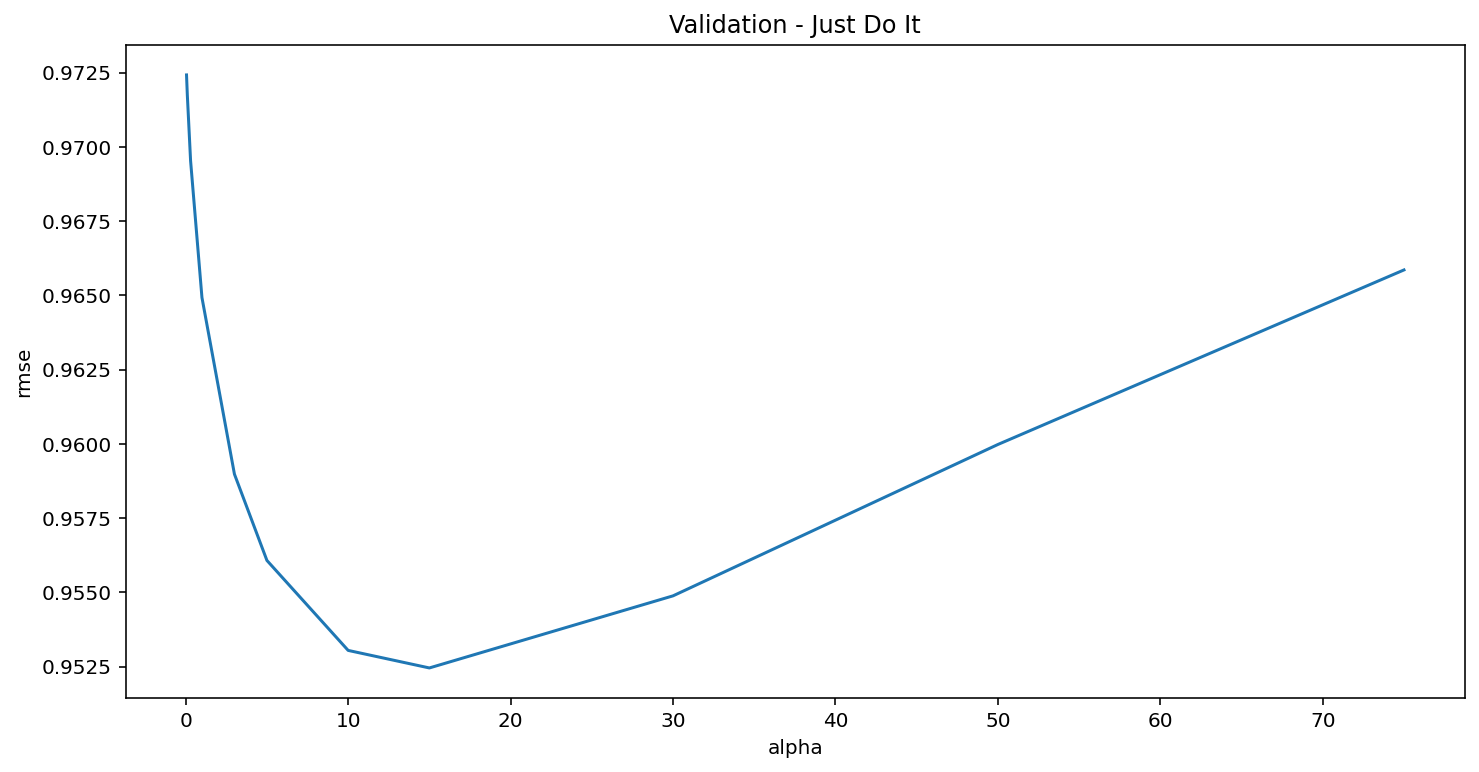

In [22]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [23]:
cv_ridge.min()

0.952456667385781

In [24]:
model_ridge = Ridge(alpha = 15).fit(X_train, y_train)

In [25]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87.84390413582378, tolerance: 1.0066005214332432
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.02029068680167, tolerance: 1.0066005214332432
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.24155834257726, tolerance: 0.98432326243833
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125.176773

In [26]:
rmse_cv(model_lasso).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.58927702274241, tolerance: 0.8050450483974277
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.01091492403884, tolerance: 0.8050450483974277
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.36548829116623, tolerance: 0.8266577870016394
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.203562

0.9556914644085657

In [27]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [28]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 103 variables and eliminated the other 157 variables


In [29]:
#important coeficients
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

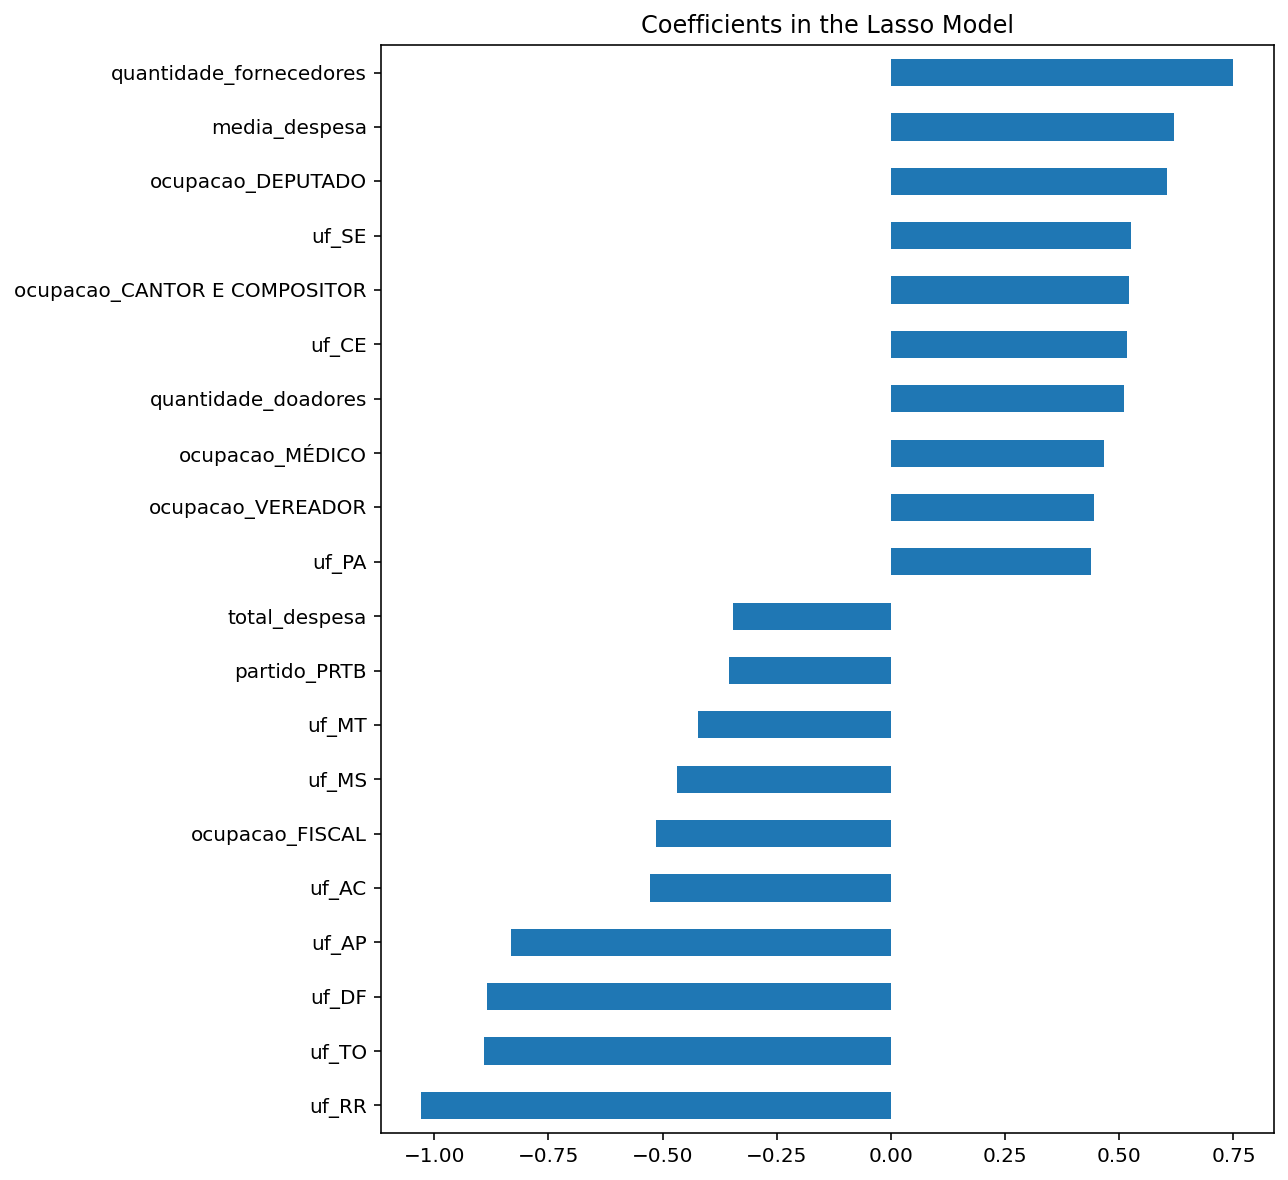

In [30]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

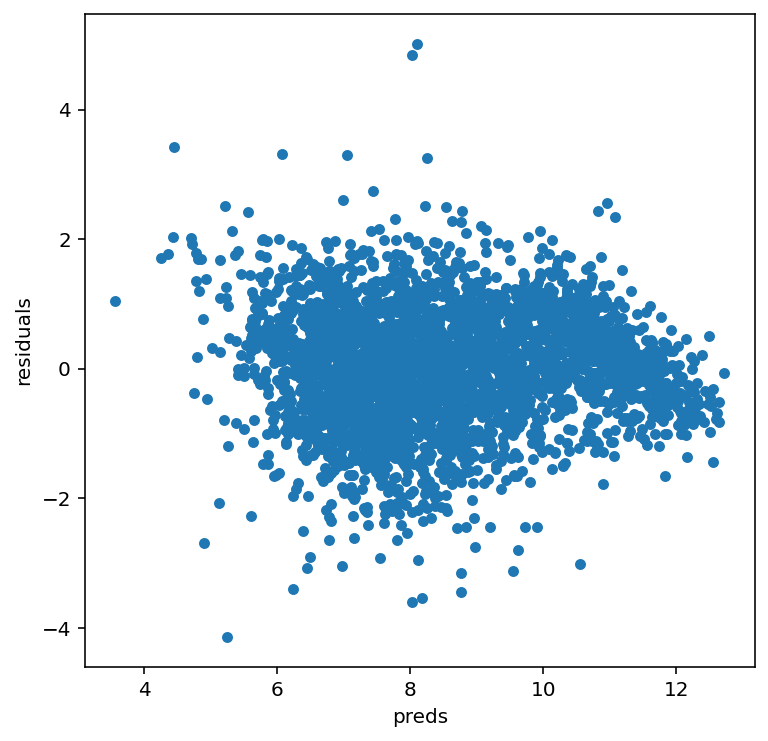

In [31]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [32]:
import xgboost as xgb

In [33]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_dev)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

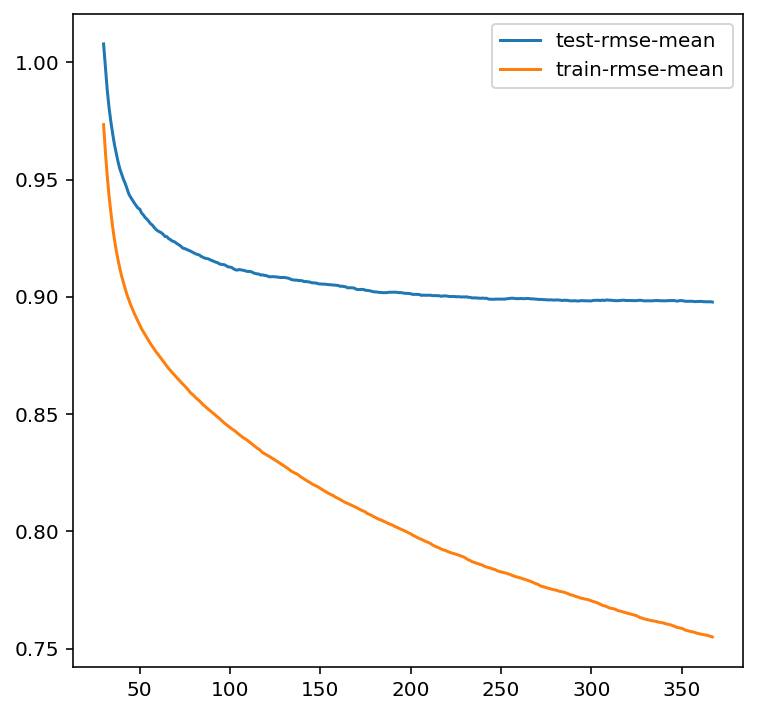

In [34]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [35]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y_train)

[15:08:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=2, n_estimators=360)

In [36]:
xgb_preds = np.expm1(model_xgb.predict(X_dev))
lasso_preds = np.expm1(model_lasso.predict(X_dev))
ridge_preds = np.expm1(model_ridge.predict(X_dev))

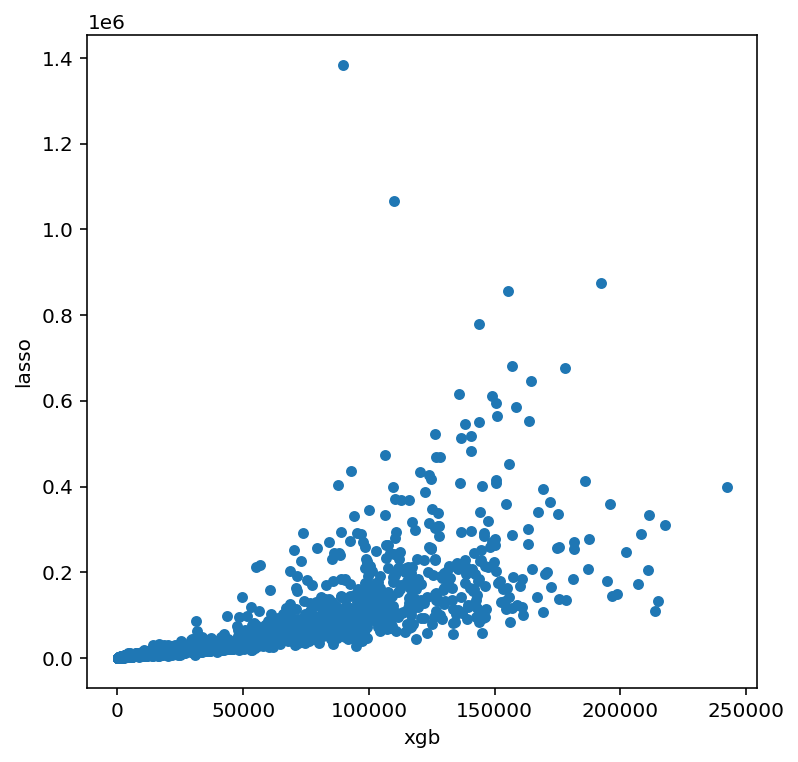

In [37]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [39]:
combined_preds = 0.7*lasso_preds + 0.3*xgb_preds

In [40]:
solution = pd.DataFrame({"Nome":dev.nome, "Votos":combined_preds})
solution

,Nome,Votos
6027,MARCO ANTONIO DOS SANTOS,947.503649
6015,SERGIO IVAN MORAES,98863.844576
6014,SERGIO GLENI ORASMO,5280.269303
6013,RONALDO NOGUEIRA DE OLIVEIRA,18719.158641
6011,PAULO RENATO PULZ,2219.837913
...,...,...
4706,JÚLIO CARLOS GASPARETTE,35754.872488
4707,SOLANGE VITÓRIA LOURENÇO OLIVEIRA,1772.381200
4708,MAIRA DOS SANTOS CARLOS,712.274292
4710,PAULO CESAR FERREIRA DOS SANTOS,26355.003514


In [41]:
rmses = { "RMSE for xgboost":rmse_cv(model_xgb, crossval = True).mean(), "RMSE for Lasso":rmse_cv(model_lasso, crossval = True).mean(), "RMSE for Ridge":rmse_cv(model_ridge, crossval = True).mean() }

[15:12:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:12:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:12:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:12:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:12:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:12:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:12:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:13:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.58927702274241, tolerance: 0.8050450483974277
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.01091492403884, tolerance: 0.8050450483974277
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.36548829116623, tolerance: 0.8266577870016394
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.203562

In [42]:
print(rmses)

{'RMSE for xgboost': 0.930896812760361, 'RMSE for Lasso': 0.9915663753880686, 'RMSE for Ridge': 0.9920874805255606}


Como podemos ver, o melhor modelo foi o XGBOOST

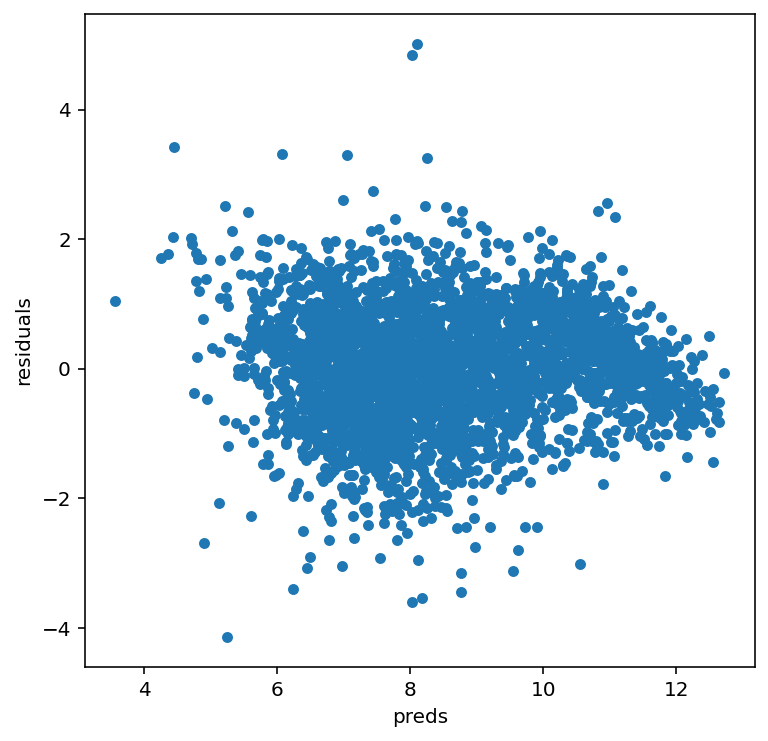

In [45]:
#RESIDUALS VS PREDICTIONS FOR LASSO
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

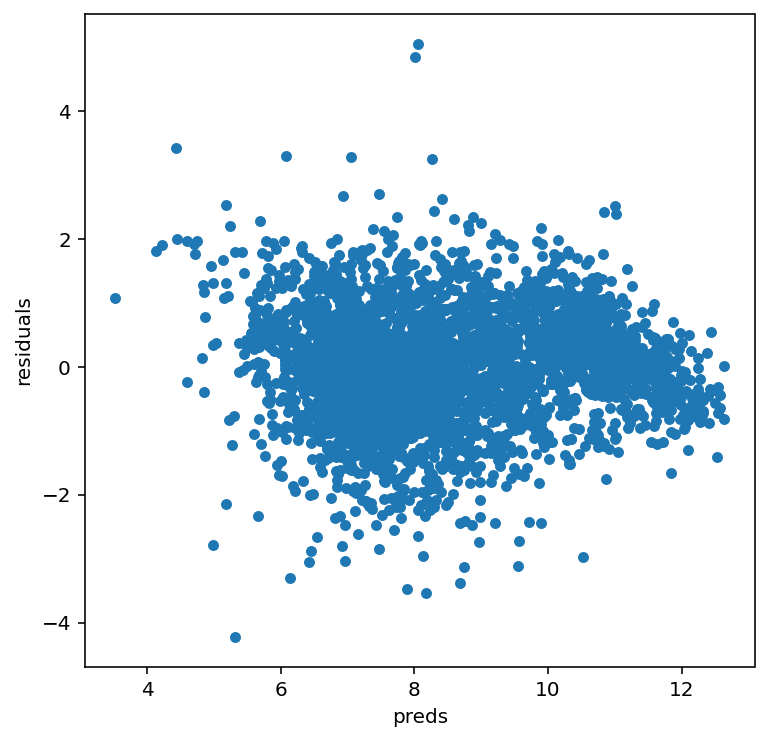

In [46]:
#RESIDUALS VS PREDICTIONS FOR RIDGE
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_ridge.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

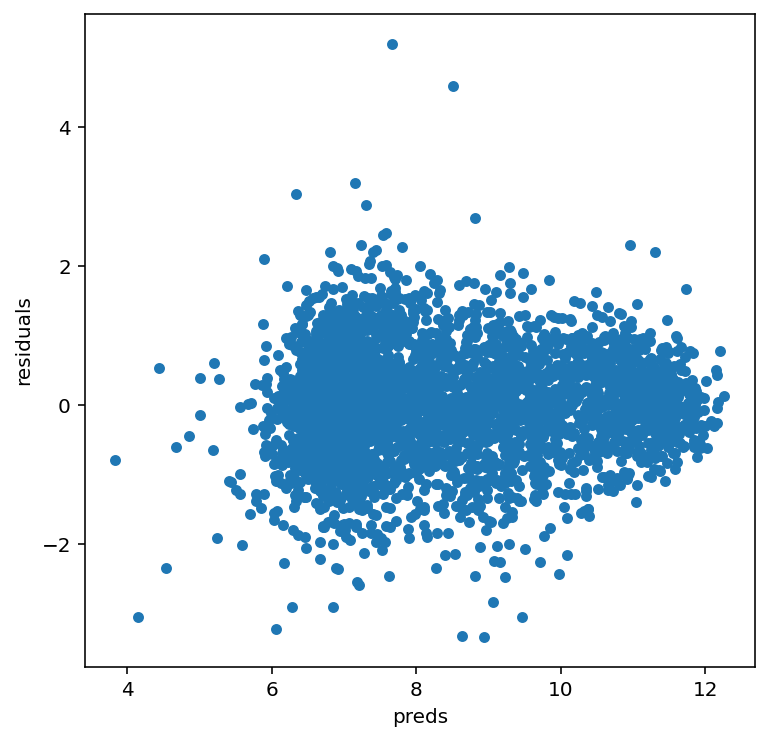

In [47]:
#RESIDUALS VS PREDICTIONS FOR XGBOOST
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_xgb.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

Como podemos ver, os plots representam bons indícios de adequabilidade dos modelos!

In [48]:
model_xgb.fit(all_data, np.log1p(dados["votos"]))
model_lasso.fit(all_data, np.log1p(dados["votos"]))
model_ridge.fit(all_data, np.log1p(dados["votos"]))

[15:16:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 436.1631944616829, tolerance: 2.370776236893092
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294.3017254019487, tolerance: 2.370776236893092
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 500.02308554476576, tolerance: 2.3326024213996193
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308.566021

Ridge(alpha=15)

In [49]:
xgb_preds = np.expm1(model_xgb.predict(all_data))

In [50]:
#LINK DATASET DE TESTE (ANO 2014): https://raw.githubusercontent.com/viniciuscva/disciplinaAM/main/previsao_de_votacao_de_deputados/eleicoes_2014.csv

In [51]:
dados_2014 = pd.read_csv("https://raw.githubusercontent.com/viniciuscva/disciplinaAM/main/previsao_de_votacao_de_deputados/eleicoes_2014.csv")
dados_2014.head()

,ano,sq_candidato,nome_candidato,sigla_uf,sigla_partido,qtd_doacoes,qtd_doadores,total_receita,media_receita,recursos de outros candidatos/comitês,...,qtd_despesas,qtd_fornecedores,total_despesa,media_despesa,descricao_cargo,sexo,grau_instrucao,estado_civil,descricao_ocupacao,votos
0,2014,10000000135,EMERSON DA SILVA SANTOS,AC,PSOL,3,3,1580.00,526.666667,NaN,...,3,3,1580.00,526.666667,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",37
1,2014,10000000142,GERALDO SILVA DOS SANTOS,AC,PSOL,5,5,3180.00,636.000000,NaN,...,6,5,3130.02,626.004000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),VIGILANTE,383
2,2014,10000000158,CARLOS CESAR CORREIA DE MESSIAS,AC,PSB,40,38,333293.13,8770.871842,1923.07,...,145,139,326869.78,2351.581151,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),OUTROS,26448
3,2014,10000000161,IDESIO LUIS FRANKE,AC,PT,29,29,156719.32,5404.114483,39122.32,...,136,121,241016.07,1991.868347,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),AGRÔNOMO,9896
4,2014,10000000163,LEONARDO CUNHA DE BRITO,AC,PT,160,146,711083.00,4870.431507,10000.00,...,518,354,567401.15,1602.828107,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ADVOGADO,20876


In [52]:
dados.shape

(7330, 23)

In [53]:
dados_2014.shape

(4936, 23)

In [54]:
dados.columns

Index(['ano', 'sequencial_candidato', 'nome', 'uf', 'partido',
       'quantidade_doacoes', 'quantidade_doadores', 'total_receita',
       'media_receita', 'recursos_de_outros_candidatos/comites',
       'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas',
       'recursos_proprios', 'quantidade_despesas', 'quantidade_fornecedores',
       'total_despesa', 'media_despesa', 'cargo', 'sexo', 'grau',
       'estado_civil', 'ocupacao', 'votos'],
      dtype='object')

In [55]:
dados_2014.columns

Index(['ano', 'sq_candidato', 'nome_candidato', 'sigla_uf', 'sigla_partido',
       'qtd_doacoes', 'qtd_doadores', 'total_receita', 'media_receita',
       'recursos de outros candidatos/comitês', 'recursos de pessoas físicas',
       'recursos de pessoas jurídicas', 'recursos próprios', 'qtd_despesas',
       'qtd_fornecedores', 'total_despesa', 'media_despesa', 'descricao_cargo',
       'sexo', 'grau_instrucao', 'estado_civil', 'descricao_ocupacao',
       'votos'],
      dtype='object')

In [56]:
dados_2014.columns = ['ano', 'sequencial_candidato', 'nome', 'uf', 'partido',\
       'quantidade_doacoes', 'quantidade_doadores', 'total_receita',\
       'media_receita', 'recursos_de_outros_candidatos/comites',\
       'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas',\
       'recursos_proprios', 'quantidade_despesas', 'quantidade_fornecedores',\
       'total_despesa', 'media_despesa', 'cargo', 'sexo', 'grau',\
       'estado_civil', 'ocupacao', 'votos']

In [57]:
all_data_2014 = dados_2014.loc[:, 'uf':'ocupacao']
all_data_2014.shape

(4936, 19)

In [58]:
categorical_feats = all_data_2014.dtypes[all_data_2014.dtypes == "object"].index
categorical_feats

Index(['uf', 'partido', 'cargo', 'sexo', 'grau', 'estado_civil', 'ocupacao'], dtype='object')

In [59]:
skewed_feats

Index(['quantidade_doacoes', 'quantidade_doadores', 'total_receita',
       'media_receita', 'recursos_de_outros_candidatos/comites',
       'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas',
       'recursos_proprios', 'quantidade_despesas', 'quantidade_fornecedores',
       'total_despesa', 'media_despesa'],
      dtype='object')

In [60]:
all_data_2014[skewed_feats] = np.log1p(all_data_2014[skewed_feats])
all_data_2014 = pd.get_dummies(all_data_2014)
all_data_2014 = all_data_2014.fillna(all_data_2014.mean())
print('Shape of training data:', all_data.shape)
print('Shape of test data:', all_data_2014.shape)

Shape of training data: (7330, 260)
Shape of test data: (4936, 245)


Observe que temos um problema: o processo de get_dummies nos dados de 2014 gerou menos colunas, e temos um dataset com formato diferente do que foi usado para treino. Precisamos resolver este problemas, e deixar ambos com as mesmas colunas!

In [61]:
print('Colunas que só estão no dataset de treinamento:')
colunas_exclusivas_treinamento = list(set(all_data.columns)-set(all_data_2014.columns))
for col in colunas_exclusivas_treinamento:
  print('  '+col)

Colunas que só estão no dataset de treinamento:
  ocupacao_OPERADOR DE COMPUTADOR
  ocupacao_MESTRE E CONTRAMESTRE DE EMBARCAÇÃO
  ocupacao_ARTISTA DE CIRCO
  ocupacao_ASTRÔNOMO
  ocupacao_TELEFONISTA
  ocupacao_TRABALHADOR DE MINAS E PEDREIRAS, SONDADOR E ASSEMELHADOS
  ocupacao_SERVIDOR DA JUSTIÇA ELEITORAL
  partido_PL
  ocupacao_TABELIÃO
  ocupacao_FONOAUDIÓLOGO
  ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS
  ocupacao_PREFEITO
  ocupacao_TRABALHADOR DE USINAGEM DE METAIS
  ocupacao_ALFAIATE E COSTUREIRO
  ocupacao_DETETIVE PARTICULAR
  ocupacao_FIANDEIRO, TECELÃO, TINGIDOR E ASSEMELHADOS
  ocupacao_TRABALHADOR DE FABRICAÇÃO E PREPARAÇÃO DE ALIMENTOS E BEBIDAS
  ocupacao_DEMONSTRADOR
  ocupacao_FÍSICO
  partido_PAN
  ocupacao_BIBLIOTECÁRIO
  ocupacao_ENCANADOR, SOLDADOR, CHAPEADOR E CALDEIREIRO
  ocupacao_CAPITALISTA DE ATIVOS FINANCEIROS
  ocupacao_MODELO
  partido_PRONA
  ocupacao_ESCULTOR E PINTOR
  ocupacao_FRENTISTA
  ocupacao_TÉCNICO DE BIOLOGIA
  ocup

In [62]:
print('Colunas que só estão no dataset de teste:')
colunas_exclusivas_teste = list(set(all_data_2014.columns)-set(all_data.columns))
for col in colunas_exclusivas_teste:
  print('  '+col)

Colunas que só estão no dataset de teste:
  partido_PROS
  ocupacao_OCEANÓGRAFO
  ocupacao_ATENDENTE DE LANCHONETE E RESTAURANTE
  ocupacao_MASSAGISTA
  ocupacao_RELAÇÕES-PÚBLICAS
  ocupacao_NUTRICIONISTA E ASSEMELHADOS
  ocupacao_TÉCNICO DE QUÍMICA
  ocupacao_MINISTRO DE ESTADO
  ocupacao_ESTOFADOR
  ocupacao_GEOFÍSICO
  partido_PSD
  ocupacao_ECONOMISTA DOMÉSTICO
  partido_PPL
  ocupacao_BACTERIOLOGISTA E ASSEMELHADOS
  partido_SD
  ocupacao_BOMBEIRO CIVIL
  ocupacao_EMPREGADO DOMÉSTICO
  ocupacao_AGENTE DE SERVIÇOS FUNERÁRIOS E EMBALSAMADOR
  ocupacao_METEOROLOGISTA
  partido_PEN
  ocupacao_CATADOR DE RECICLÁVEIS
  ocupacao_JORNALEIRO


Primeiramente iremos deletar as colunas que são exclusivas dos dados de teste, pois o modelo treinado não aprendeu a analisar estas características. 

Em seguida, precisamos adicionar as colunas faltantes nos dados de teste, e atribuir o valor 0

Por último precisamos garantir que a ordem das colunas no teste seja igual ao treino

In [63]:
colunas_comuns = list(set(all_data_2014.columns) & set(all_data.columns))
len(colunas_comuns)

223

In [64]:
all_data_2014 = all_data_2014[colunas_comuns]
all_data_2014.shape

(4936, 223)

In [65]:
all_data_2014[colunas_exclusivas_treinamento] = 0
all_data_2014.shape

(4936, 260)

In [66]:
#Agora vamos acertar a ordem das colunas
all_data.columns

Index(['quantidade_doacoes', 'quantidade_doadores', 'total_receita',
       'media_receita', 'recursos_de_outros_candidatos/comites',
       'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas',
       'recursos_proprios', 'quantidade_despesas', 'quantidade_fornecedores',
       ...
       'ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS',
       'ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA',
       'ocupacao_TÉCNICO EM EDIFICAÇÕES', 'ocupacao_TÉCNICO EM INFORMÁTICA',
       'ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA',
       'ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS',
       'ocupacao_VEREADOR', 'ocupacao_VETERINÁRIO', 'ocupacao_VIGILANTE',
       'ocupacao_ZOOTECNISTA'],
      dtype='object', length=260)

In [67]:
all_data_2014.columns

Index(['ocupacao_PROGRAMADOR DE COMPUTADOR', 'ocupacao_ANALISTA DE SISTEMAS',
       'ocupacao_ENFERMEIRO', 'uf_PB', 'ocupacao_PSICÓLOGO',
       'ocupacao_SERVIDOR PÚBLICO ESTADUAL',
       'ocupacao_TÉCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO ENFERMEIRO)',
       'ocupacao_OUTROS', 'ocupacao_ELETRICISTA E ASSEMELHADOS',
       'ocupacao_TRABALHADOR DOS SERVIÇOS DE CONTABILIDADE, DE CAIXA E ASSEMELHADOS',
       ...
       'ocupacao_TÉCNICO DE BIOLOGIA',
       'ocupacao_OPERADOR DE INSTALAÇÃO DE PRODUÇÃO DE ENERGIA ELÉTRICA E NUCLEAR',
       'ocupacao_SECURITÁRIO', 'partido_PFL',
       'ocupacao_TAQUÍGRAFO E ESTENÓGRAFO',
       'ocupacao_FEIRANTE, AMBULANTE E MASCATE',
       'ocupacao_MARINHEIRO CIVIL, CANOEIRO, EMBARCADO E ASSEMELHADOS',
       'ocupacao_ARQUEÓLOGO', 'ocupacao_TRABALHADOR DE ARTES GRÁFICAS',
       'ocupacao_LEILOEIRO, AVALIADOR E ASSEMELHADOS'],
      dtype='object', length=260)

In [68]:
all_data_2014 = all_data_2014[list(all_data.columns)]
all_data_2014.columns

Index(['quantidade_doacoes', 'quantidade_doadores', 'total_receita',
       'media_receita', 'recursos_de_outros_candidatos/comites',
       'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas',
       'recursos_proprios', 'quantidade_despesas', 'quantidade_fornecedores',
       ...
       'ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS',
       'ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA',
       'ocupacao_TÉCNICO EM EDIFICAÇÕES', 'ocupacao_TÉCNICO EM INFORMÁTICA',
       'ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA',
       'ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS',
       'ocupacao_VEREADOR', 'ocupacao_VETERINÁRIO', 'ocupacao_VIGILANTE',
       'ocupacao_ZOOTECNISTA'],
      dtype='object', length=260)

In [69]:
X_test = all_data_2014
y_test = np.log1p(dados_2014.votos)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_test: (4936, 260)
Shape of y_test: (4936,)


In [75]:
xgb_preds_2014 = np.expm1(model_xgb.predict(X_test))
lasso_preds_2014 = np.expm1(model_lasso.predict(X_test))
ridge_preds_2014 = np.expm1(model_ridge.predict(X_test))

xgb_rmse = rmse_cv(model_xgb, X = X_test, y = y_test).mean()
lasso_rmse = rmse_cv(model_lasso, X = X_test, y = y_test).mean()
ridge_rmse = rmse_cv(model_ridge, X = X_test, y = y_test).mean()

rmses = {'xgb_rmse': xgb_rmse,
         'lasso_rmse': lasso_rmse,
         'ridge_rmse': ridge_rmse}




[15:32:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262.46962683941274, tolerance: 2.1063906133511576
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242.96883211504246, tolerance: 2.1063906133511576
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496.75398485627557, tolerance: 2.0251878693271848
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 868.21

In [76]:
print('RMSE\'s nos dados de teste para os melhores modelos:')
print(rmses)

RMSE's nos dados de teste para os melhores modelos:
{'xgb_rmse': 1.6962033214259307, 'lasso_rmse': 1.7103405705335728, 'ridge_rmse': 1.6942599704962578}


### Observamos assim que o modelo com Ridge regression e alpha = 15 foi o vencedor nos dados de teste.